# RL agent set up


This notebook set up RL agents base on a latest RL platform `stable-baseline3`.

The `stable-baseline3` provides multiple RL algorithms that works with OpenAI `gym`.

They also publish a paper on the Journal of Machine Learning Research, Stable-Baselines3: Reliable Reinforcement Learning
Implementations[https://www.jmlr.org/papers/volume22/20-1364/20-1364.pdf].

The platform is published on github[https://github.com/DLR-RM/stable-baselines3].

They also provide a documentation for usage.[https://stable-baselines3.readthedocs.io/en/master/guide/install.html]

In [1]:
import gym
from numpy import arange
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from stable_baselines3 import A2C, DQN
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy

Create cartpole environment from OpenAI gym.

Set up DQN agent from Stable-Baseline3 (SB3).

In [11]:
env = gym.make('CartPole-v0')
model = DQN("MlpPolicy", env, verbose=1, tensorboard_log="../../log/dqn_cartpole_tensorboard/")
model.learn(total_timesteps=500000)
model.save("../../log/dqn_cartpole")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ../../log/dqn_cartpole_tensorboard/DQN_3
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19       |
|    ep_rew_mean      | 19       |
|    exploration_rate | 0.999    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 7223     |
|    time_elapsed     | 0        |
|    total_timesteps  | 76       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.1     |
|    ep_rew_mean      | 20.1     |
|    exploration_rate | 0.997    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 7742     |
|    time_elapsed     | 0        |
|    total_timesteps  | 161      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_me

Visualize the learning curve

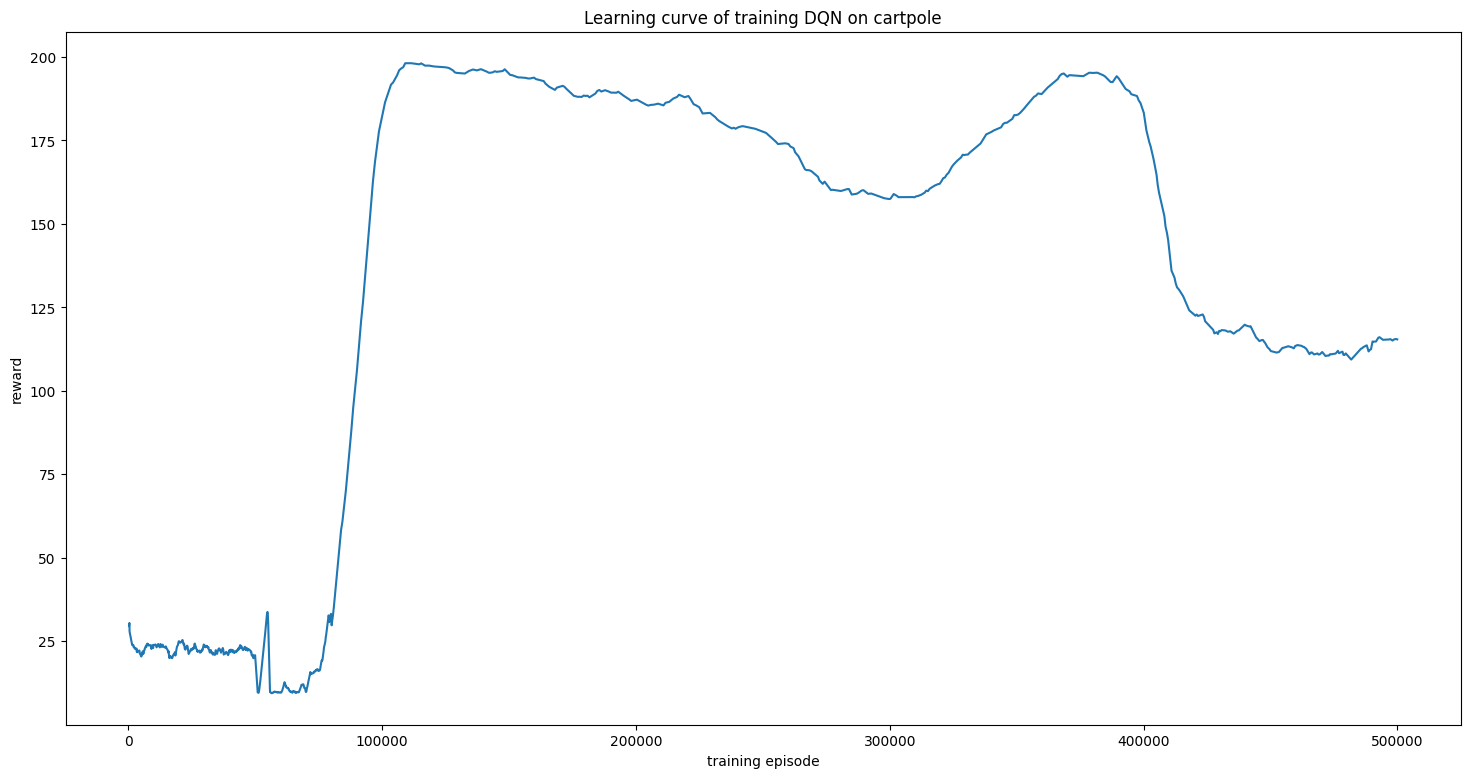

In [8]:
reward_per_episode = pd.read_csv('../../log/DQN_2.csv',  header = 1, usecols = [1,2], index_col = [0], engine='c')

plt.figure(figsize=(18, 9))
plt.plot(reward_per_episode)
plt.title('Learning curve of training DQN on cartpole')
plt.xlabel('training episode')
plt.ylabel('reward')
plt.show()

Test the well trained agent on the same environment

In [13]:
model = DQN.load("../../log/dqn_cartpole")
reward_list, episode_list = evaluate_policy(model = model, env = env, n_eval_episodes = 1000, deterministic = False, render = False, return_episode_rewards = True)

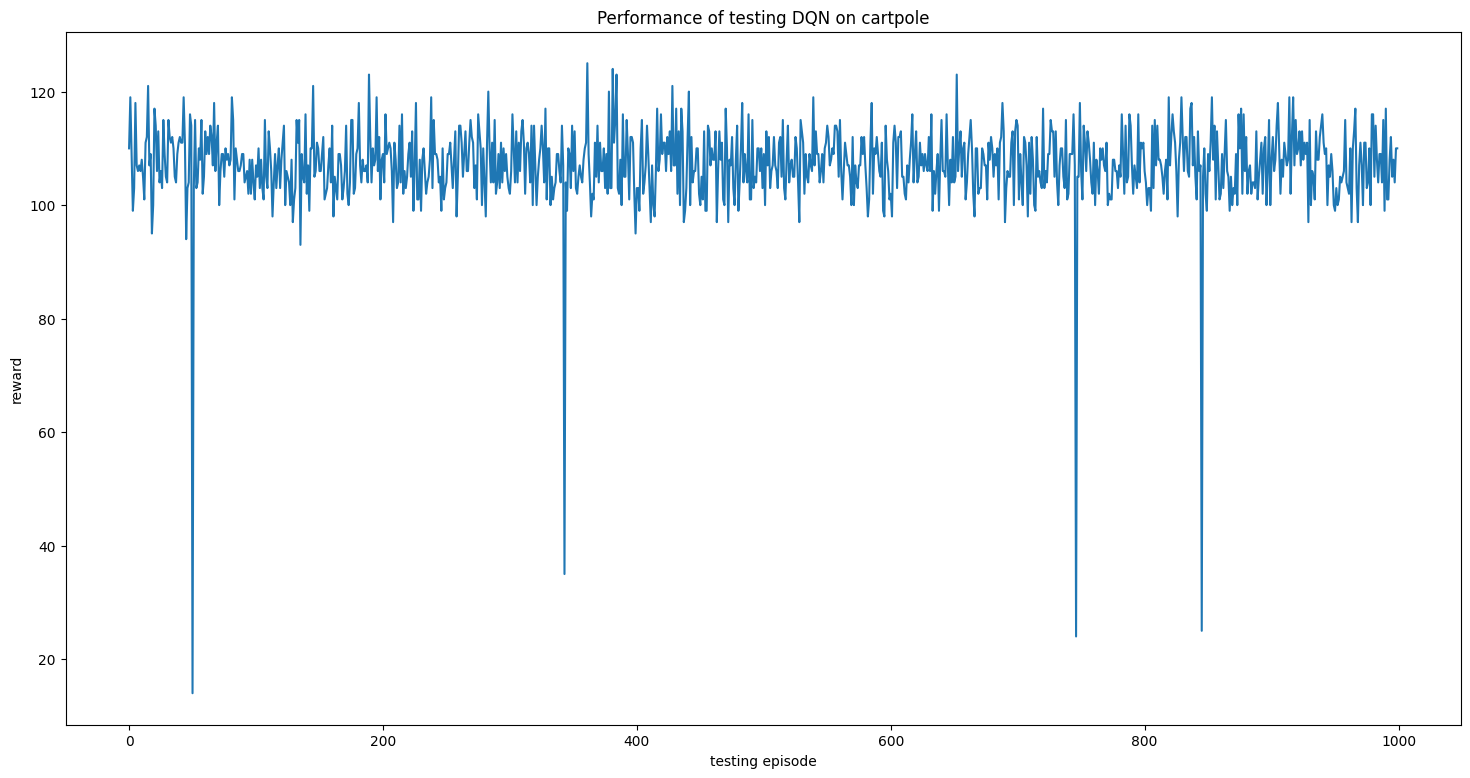

In [14]:
# visualize the testing performance
plt.figure(figsize=(18, 9))
plt.plot(reward_list)
plt.title('Performance of testing DQN on cartpole')
plt.xlabel('testing episode')
plt.ylabel('reward')
plt.show()